In [1]:
#
# Discrete-time Average Consensus
# Ivano Notarnicola, Lorenzo Pichierri
# Bologna, 09/03/2022
#

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# Some technical settings
import matplotlib as mpl
np.set_printoptions(precision=3)
# np.random.seed(0)


# Discrete-time Average Consensus

This section is devoted to ...
\
Let define a random graph 

Adjacency matrix: 
 [[0 1 0 0 1 0 0 0 0 1]
 [1 0 1 0 0 1 1 0 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 1 1 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]]
the graph is connected, drawing graph:


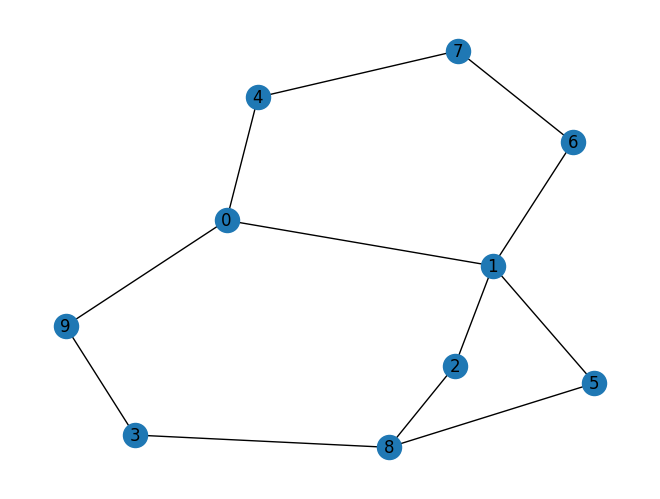

In [2]:
# Creates a random graph. The nodes have a "p_ER" chance of being connected. 
# Useful to test different kinds of systems

NN = 10
p_ER = 0.3

I_NN = np.identity(NN, dtype=int)

while 1:
    G = nx.binomial_graph(NN,p_ER)
    Adj = nx.adjacency_matrix(G)
    Adj = Adj.toarray() # Makes it "normal" array so we can work on it
    test = np.linalg.matrix_power((I_NN+Adj),NN) # A check to see if the random created graph is connected
    print("Adjacency matrix: \n", Adj)
    if np.all(test>0):
        print("the graph is connected, drawing graph:")
        
        break 
    else:
        print("the graph is NOT connected.. Let's try agian!")
        

nx.draw(G, with_labels = True)



### Compute mixing matrices

In [3]:
ONES = np.ones((NN,NN))
ZEROS = np.zeros((NN,NN))

threshold = 1e-10
WW = 0.7*Adj + 0.9*I_NN # Arbitrary, could scale the numbers.
WW = np.abs(WW)


print("\nColumns summed: ", np.sum(WW,axis=0)) # sums the columns in a matrix
print("Rows summed: ", np.sum(WW,axis=1)) # sums the rows in a matrix
print("\nNotice they are not stochastic (they don't sum up to 1)")
print("For the push-sum consensus to work it needs to be column-stochastic.")
print("However, the normal average consensus needs it to be both column- and row-stochastic")


Columns summed:  [3.  3.7 2.3 2.3 2.3 2.3 2.3 2.3 3.  2.3]
Rows summed:  [3.  3.7 2.3 2.3 2.3 2.3 2.3 2.3 3.  2.3]

Notice they are not stochastic (they don't sum up to 1)
For the push-sum consensus to work it needs to be column-stochastic.
However, the normal average consensus needs it to be both column- and row-stochastic


### Check Stochasticity

 (testing)
 column stocasticity:

In [4]:
while any(abs(np.sum(WW,axis=0)-1) > threshold):
    WW = WW/(ONES@WW) # -> Col-stochasticity
    WW = np.maximum(WW,ZEROS)

print('Check Stochasticity:\n row: {} \n column {}'.format(
    np.sum(WW,axis=1),
    np.sum(WW,axis=0)
    ))

print("\nNew weight matrix, WW: \n", WW)

Check Stochasticity:
 row: [1.098 1.39  0.814 0.929 0.929 0.814 0.885 1.    1.213 0.929] 
 column [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

New weight matrix, WW: 
 [[0.3   0.189 0.    0.    0.304 0.    0.    0.    0.    0.304]
 [0.233 0.243 0.304 0.    0.    0.304 0.304 0.    0.    0.   ]
 [0.    0.189 0.391 0.    0.    0.    0.    0.    0.233 0.   ]
 [0.    0.    0.    0.391 0.    0.    0.    0.    0.233 0.304]
 [0.233 0.    0.    0.    0.391 0.    0.    0.304 0.    0.   ]
 [0.    0.189 0.    0.    0.    0.391 0.    0.    0.233 0.   ]
 [0.    0.189 0.    0.    0.    0.    0.391 0.304 0.    0.   ]
 [0.    0.    0.    0.    0.304 0.    0.304 0.391 0.    0.   ]
 [0.    0.    0.304 0.304 0.    0.304 0.    0.    0.3   0.   ]
 [0.233 0.    0.    0.304 0.    0.    0.    0.    0.    0.391]]


## Consensus 

$x_{i,t+1} = \sum_{j \in N_i} w_{ij} x_{j,t} $

## Push-sum Consensus


$x_{i,t+1} = \sum_{j \in N_i} w_{ij} x_{j,t} $

$y_{i,t+1} = \sum_{j \in N_i} w_{ij} y_{j,t} $

$z_{i,t+1} = {x_{i,t+1} \over y_{i,t+1}}$



In [5]:
MAXITERS = 100
XX = np.zeros((NN,MAXITERS))
YY = np.zeros((NN,MAXITERS))
ZZ = np.zeros((NN,MAXITERS))

XX_init = []
for i in range(0,NN):
    n = random.uniform(0,7)
    XX_init.append(n)

ZZ[:,0] = XX_init
YY_init = NN*[1]
print(YY_init)
XX[:,0] = XX_init 
YY[:,0] = YY_init

for tt in range (MAXITERS-1):
	for ii in range (NN):
		# Find the set of neighbors
		Nii = np.nonzero(Adj[ii])[0]

		# Initiate x_i(t+1) and y_i(t+1), include self-loop?
		XX[ii,tt+1] = WW[ii,ii]*XX[ii,tt]
		YY[ii,tt+1] = WW[ii,ii]*YY[ii,tt]
		     

		# Update x_i(t+1) and y_i(t+1) with neighbors' weighted state
		for jj in Nii:
			XX[ii,tt+1] += WW[ii,jj]*XX[jj,tt]
			YY[ii,tt+1] += WW[ii,jj]*YY[jj,tt]
            
        # Update z_i(t+1)
		ZZ[ii,tt+1] = XX[ii,tt+1] / YY[ii,tt+1]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Compute aggregate quantities for comparison

In [6]:
avg = np.mean(XX_init, axis=0)
print(avg)
# Her push-sum consensus skal gå imot. Stiplet linje lengre ned på grafen

3.399220165816319


Plot the evolution of the local estimates

[3.164140145304607, 4.1458282069234205, 6.987124175961109, 1.0470763250940194, 6.433886003696532, 0.007715501295061045, 3.8483459435257727, 2.051111393812599, 0.5397849915066434, 5.767188971043425]


<Figure size 960x720 with 0 Axes>

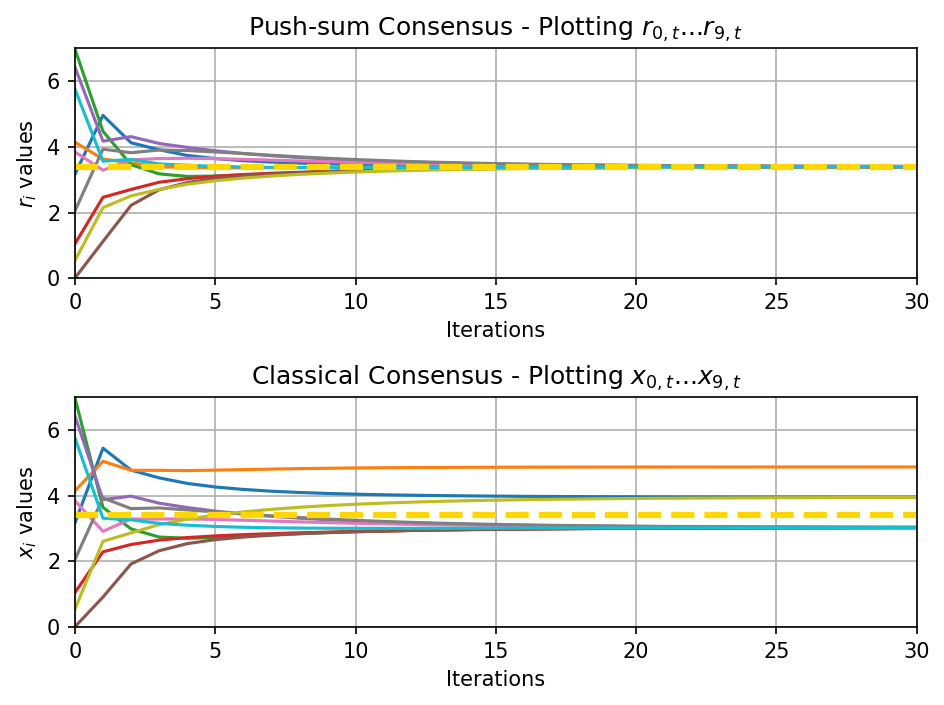

In [17]:
mpl.rcParams['figure.dpi']= 150
plt.figure()

figure, (ax1, ax2) = plt.subplots(2,1)

# Local Estimates
for ii in range(NN):
	ax1.plot(np.arange(MAXITERS), ZZ[ii])
	ax2.plot(np.arange(MAXITERS), XX[ii])

# Average Constant Line
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

ax1.plot(np.arange(MAXITERS), np.repeat(avg,MAXITERS), '--', linewidth=3, color='gold')
ax2.plot(np.arange(MAXITERS), np.repeat(avg,MAXITERS), '--', linewidth=3, color='gold')

ax1.set_xlim(0,30)
ax2.set_xlim(0,30)

ax1.set_ylabel('$r_i$ values')
ax2.set_ylabel('$x_i$ values')

ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')

ax1.set_ylim(0,7)
ax2.set_ylim(0,7)

ax1.set_title('Push-sum Consensus - Plotting $r_{0,t}$...$r_{9,t}$')
ax2.set_title('Classical Consensus - Plotting $x_{0,t}$...$x_{9,t}$')
ax1.grid()
ax2.grid()

figure.tight_layout()

print(XX_init)

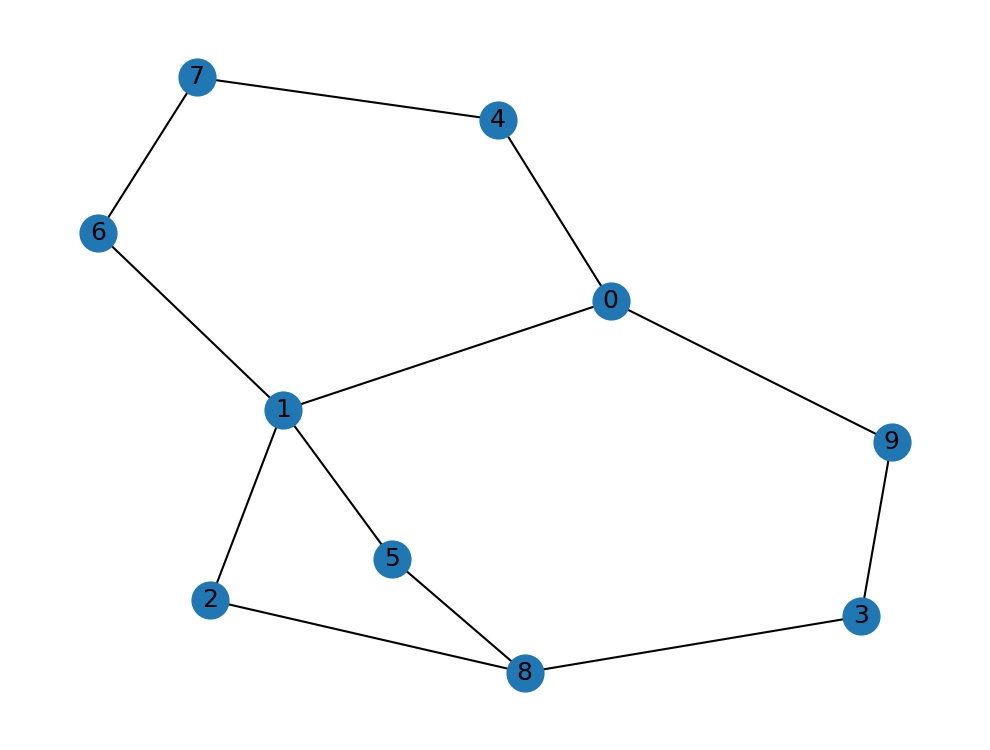

In [8]:
nx.draw(G, with_labels = True)

In [9]:
print(I_NN)

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [10]:
print(Adj)

[[0 1 0 0 1 0 0 0 0 1]
 [1 0 1 0 0 1 1 0 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 1 1 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]]


In [11]:
print(WW) # Should be column stochastic (the columns sums to 1)

[[0.3   0.189 0.    0.    0.304 0.    0.    0.    0.    0.304]
 [0.233 0.243 0.304 0.    0.    0.304 0.304 0.    0.    0.   ]
 [0.    0.189 0.391 0.    0.    0.    0.    0.    0.233 0.   ]
 [0.    0.    0.    0.391 0.    0.    0.    0.    0.233 0.304]
 [0.233 0.    0.    0.    0.391 0.    0.    0.304 0.    0.   ]
 [0.    0.189 0.    0.    0.    0.391 0.    0.    0.233 0.   ]
 [0.    0.189 0.    0.    0.    0.    0.391 0.304 0.    0.   ]
 [0.    0.    0.    0.    0.304 0.    0.304 0.391 0.    0.   ]
 [0.    0.    0.304 0.304 0.    0.304 0.    0.    0.3   0.   ]
 [0.233 0.    0.    0.304 0.    0.    0.    0.    0.    0.391]]
